In [1]:
# Import Dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import sqlalchemy
from sqlalchemy import create_engine, MetaData, func
from sqlalchemy import Column, Integer, String, Float, Numeric, Text
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session


In [2]:
# Import clean data
df_1 = pd.read_csv('clean_hawaii_measurements.csv', index_col = False)
df_2 = pd.read_csv('clean_hawaii_stations.csv', index_col = False)
#df_1 = df_1[['station','date','tobs','precipitation']]
#df_2 = df_2[['station','name','latitude','longitude','elevation']]

In [3]:
# Retrive the types of dataframe
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19550 entries, 0 to 19549
Data columns (total 4 columns):
station          19550 non-null object
date             19550 non-null object
tobs             19550 non-null int64
precipitation    19550 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 611.0+ KB


In [4]:
df_1.head()

,station,date,tobs,precipitation
0,USC00519397,2010-01-01,65,0.08
1,USC00519397,2010-01-02,63,0.00
2,USC00519397,2010-01-03,74,0.00
3,USC00519397,2010-01-04,76,0.00
4,USC00519397,2010-01-06,73,0.00


In [5]:
# Retrive the types of dataframe
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
station      9 non-null object
name         9 non-null object
latitude     9 non-null float64
longitude    9 non-null float64
elevation    9 non-null float64
dtypes: float64(3), object(2)
memory usage: 440.0+ bytes


In [6]:
df_2.head()

,station,name,latitude,longitude,elevation
0,USC00519397,Waikiki,21.2716,-157.8168,3.0
1,USC00513117,Kaneohe,21.4234,-157.8015,14.6
2,USC00514830,Kualoa Ranch HeadQuarters,21.5213,-157.8374,7.0
3,USC00517948,Pearl City,21.3934,-157.9751,11.9
4,USC00518838,Upper Wahiawa,21.4992,-158.0111,306.6


In [7]:
# Create Database Connection
engine = create_engine('sqlite:///hawaii.sqlite')

In [8]:
conn = engine.connect()

In [9]:
Base = declarative_base()

In [10]:
# Create tables
class Measurement(Base):
    __tablename__ = "measurements"
    id = Column(Integer, primary_key=True)
    station = Column(String)
    date = Column(String)
    tobs = Column(Integer)
    precipitation = Column(Float)

class Station(Base):
    __tablename__ = 'stations'
    id = Column(Integer, primary_key = True)
    station = Column(String)
    name = Column(String)
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)

In [11]:
Base.metadata.create_all(engine)

In [12]:
data_1 = df_1.to_dict(orient='records')
data_2 = df_2.to_dict(orient='records')

In [13]:
print(data_1[:5])
print(data_2[:5])

[{'station': 'USC00519397', 'date': '2010-01-01', 'tobs': 65, 'precipitation': 0.08}, {'station': 'USC00519397', 'date': '2010-01-02', 'tobs': 63, 'precipitation': 0.0}, {'station': 'USC00519397', 'date': '2010-01-03', 'tobs': 74, 'precipitation': 0.0}, {'station': 'USC00519397', 'date': '2010-01-04', 'tobs': 76, 'precipitation': 0.0}, {'station': 'USC00519397', 'date': '2010-01-06', 'tobs': 73, 'precipitation': 0.0}]
[{'station': 'USC00519397', 'name': 'Waikiki', 'latitude': 21.2716, 'longitude': -157.8168, 'elevation': 3.0}, {'station': 'USC00513117', 'name': 'Kaneohe', 'latitude': 21.4234, 'longitude': -157.8015, 'elevation': 14.6}, {'station': 'USC00514830', 'name': 'Kualoa Ranch HeadQuarters', 'latitude': 21.5213, 'longitude': -157.8374, 'elevation': 7.0}, {'station': 'USC00517948', 'name': 'Pearl City', 'latitude': 21.3934, 'longitude': -157.9751, 'elevation': 11.9}, {'station': 'USC00518838', 'name': 'Upper Wahiawa', 'latitude': 21.4992, 'longitude': -158.0111, 'elevation': 306.

In [14]:
metadata = MetaData(bind=engine)
metadata.reflect()

In [15]:
table_1 = sqlalchemy.Table('measurements',metadata,autoload=True)
table_2 = sqlalchemy.Table('stations',metadata,autoload=True)

In [16]:
conn.execute(table_1.delete())
conn.execute(table_2.delete())

In [17]:
conn.execute(table_1.insert(),data_1)
conn.execute(table_2.insert(),data_2)

In [18]:
conn.execute("select * from measurements limit 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 65, 0.08),
 (2, 'USC00519397', '2010-01-02', 63, 0.0),
 (3, 'USC00519397', '2010-01-03', 74, 0.0),
 (4, 'USC00519397', '2010-01-04', 76, 0.0),
 (5, 'USC00519397', '2010-01-06', 73, 0.0)]

In [19]:
conn.execute("select * from stations limit 5").fetchall()

[(1, 'USC00519397', 'Waikiki', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'Kaneohe', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'Kualoa Ranch HeadQuarters', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'Pearl City', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'Upper Wahiawa', 21.4992, -158.0111, 306.6)]

In [20]:
results = conn.execute('select date, precipitation from measurements where date > "2017-01-01" order by date ').fetchall()

In [21]:
# Connect to database and query
Base = automap_base()
Base.prepare(engine, reflect = True)
session = Session(engine)

measurements = Base.classes.measurements
stations = Base.classes.stations

results = session.query(measurements.date, measurements.precipitation).\
                    filter(measurements.date >= '2017-01-01').all()
    
df_results = pd.DataFrame(results,columns = ['date','prcp'])
df_results.set_index('date',inplace = True)
df_results.head(10)

,prcp
date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0
2017-01-06,0.0
2017-01-07,0.0
2017-01-08,0.0
2017-01-09,0.0


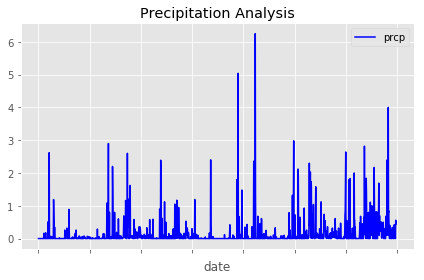

In [34]:
df_results.plot(title='Precipitation Analysis',color='blue')
plt.tight_layout()
plt.show()
plt.savefig('Precipitation Analysis.png')

In [23]:
df_results.describe()

,prcp
count,1397.000000
mean,0.150487
std,0.434943
min,0.000000
25%,0.000000
50%,0.000000
75%,0.090000
max,6.250000


In [24]:
# Query to calculate the total number of stations
total_stations = session.query(measurements).group_by(measurements.station).count()
total_stations            

9

In [25]:
# Query to find the station with the highest number of observations
most_obs = session.query(func.max(measurements.tobs),measurements.station).all()
most_obs

[(87, 'USC00519397')]

In [26]:
# List of stations and obsevations counts in descending order
observation_stations = session.query(measurements.station,measurements.tobs).\
        group_by(measurements.station).\
        order_by(measurements.tobs.desc()).all()
observation_stations

[('USC00514830', 82),
 ('USC00519523', 82),
 ('USC00517948', 81),
 ('USC00519397', 81),
 ('USC00519281', 79),
 ('USC00513117', 77),
 ('USC00516128', 76),
 ('USC00518838', 70),
 ('USC00511918', 64)]

In [27]:
# Query to retrieve the last 12 months of temperature observations
tweleve_months = session.query(measurements.tobs,measurements.date).\
        filter(measurements.date >= '2017-01-01').\
        filter(measurements.station =='USC00519397').all()
tweleve_months

[(62, '2017-01-01'),
 (66, '2017-01-02'),
 (63, '2017-01-03'),
 (62, '2017-01-04'),
 (63, '2017-01-05'),
 (64, '2017-01-06'),
 (66, '2017-01-07'),
 (60, '2017-01-08'),
 (64, '2017-01-09'),
 (63, '2017-01-10'),
 (78, '2017-01-11'),
 (67, '2017-01-12'),
 (67, '2017-01-13'),
 (65, '2017-01-14'),
 (66, '2017-01-15'),
 (67, '2017-01-16'),
 (66, '2017-01-17'),
 (72, '2017-01-18'),
 (73, '2017-01-19'),
 (71, '2017-01-20'),
 (72, '2017-01-21'),
 (72, '2017-01-22'),
 (72, '2017-01-23'),
 (69, '2017-01-24'),
 (72, '2017-01-25'),
 (71, '2017-01-26'),
 (65, '2017-01-27'),
 (64, '2017-01-28'),
 (67, '2017-01-29'),
 (67, '2017-01-30'),
 (68, '2017-01-31'),
 (70, '2017-02-01'),
 (61, '2017-02-02'),
 (65, '2017-02-03'),
 (72, '2017-02-04'),
 (73, '2017-02-05'),
 (76, '2017-02-06'),
 (64, '2017-02-07'),
 (62, '2017-02-08'),
 (61, '2017-02-09'),
 (71, '2017-02-10'),
 (69, '2017-02-11'),
 (68, '2017-02-12'),
 (74, '2017-02-13'),
 (75, '2017-02-14'),
 (75, '2017-02-15'),
 (71, '2017-02-16'),
 (71, '2017-0

In [28]:
df2_results = pd.DataFrame(tweleve_months,columns = ['tobs','date'])
df2_results.set_index('date',inplace = True)
df2_results.head(10)

,tobs
date,
2017-01-01,62
2017-01-02,66
2017-01-03,63
2017-01-04,62
2017-01-05,63
2017-01-06,64
2017-01-07,66
2017-01-08,60
2017-01-09,64


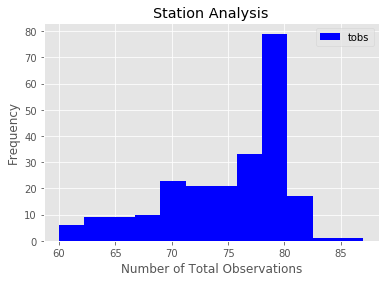

In [36]:
df2_results.plot(kind='hist',bins=12,title='Station Analysis',color='blue')
plt.xlabel('Number of Total Observations')
plt.show()
plt.savefig('Station Analysis.png')

In [30]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

results = (calc_temps('2017-02-28', '2017-03-05'))
results

[(64, 72.02777777777777, 78)]

In [31]:
ptps = list(np.ravel(results))
ptps
height = ptps[1]
height

72.02777777777777

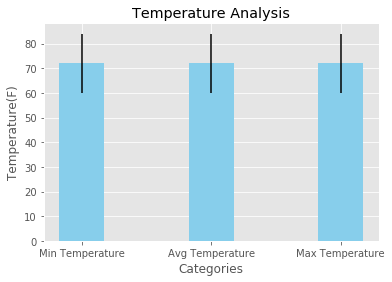

In [37]:
plt.bar(np.arange(3),height,width = 0.35,yerr=12, color = 'skyblue')
plt.xticks(np.arange(3), ('Min Temperature','Avg Temperature','Max Temperature'))
plt.title('Temperature Analysis')
plt.xlabel('Categories')
plt.ylabel('Temperature(F)')
plt.show()
plt.savefig('Temperature Analysis.png')